# 1. Setting Up

### 1.0 Import Necessary libraries

In [4]:
# Misc
import ast
import json

# Data manipulation
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()

### 1.1 Load the business dataset

In [ ]:
!python json_to_csv_converter.py yelp_academic_dataset_business.json

In [5]:
business = pd.read_csv('yelp_academic_dataset_business_full.csv')

In [6]:
business = pd.read_csv('yelp_academic_dataset_business_full.csv')
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 61 columns):
hours.Friday                             141796 non-null object
attributes.RestaurantsAttire             48182 non-null object
attributes.BikeParking                   84891 non-null object
state                                    188593 non-null object
categories                               188052 non-null object
attributes.BusinessParking               103424 non-null object
attributes.Alcohol                       47892 non-null object
attributes.GoodForDancing                9162 non-null object
attributes.BYOB                          911 non-null object
attributes.DietaryRestrictions           138 non-null object
attributes.RestaurantsReservations       51363 non-null object
attributes.GoodForKids                   64931 non-null object
attributes.Smoking                       8113 non-null object
hours.Sunday                             93387 non-null object
attribute

In [7]:
# Find the total number of categories for all businesses
cat_all_biz = ','.join(business['categories'].dropna()).replace(" ", "")
cat_all_biz = pd.DataFrame(cat_all_biz.split(','), columns=['category'])
cat_all_biz_count = cat_all_biz.category.value_counts().sort_values(ascending = False)
print(f"The number of categories of business is {len(cat_all_biz_count)}")

The number of categories of business is 1305


In [8]:
cat_all_biz_count[0:10]

Restaurants       57173
Shopping          30231
Food              27118
Beauty&Spas       18967
HomeServices      18634
Health&Medical    16157
LocalServices     12906
Automotive        12656
Nightlife         12438
Bars              10853
Name: category, dtype: int64

### 1.2 Choose only business with food, drink or dessert (food businesses)

In [9]:
food_masks = ['Restaurants', 'Food','Sandwiches', 'FastFood', 'Breakfast&Brunch', 'SpecialtyFood', 'Burgers',
                    'American(Traditional)', 'American(New)','Pizza', 'Italian','African','Falafel','Turkish',
                    'Desserts', 'Bakeries', 'Salad','ChickenWings', 'Mexican','Seafood','Chinese','Malaysian',
                    'IceCream&FrozenYogurt', 'Delis', 'Japanese', 'Bars', 'Canadian(New)', 'AsianFusion',
                    'Mediterranean', 'SushiBars','JuiceBars&Smoothies','Steakhouses','Coffee&Tea','Pretzels','PanAsian',
                    'Barbeque','Beer','Wine&Spirits','SportsBars', 'Pubs','British','Poke','Delicatessen',
                     'Lounges', 'WineBars', 'CocktailBars', 'Diners','Patisserie/CakeShop','Kosher','Afghan',
                     'Vegetarian', 'EthnicFood', 'MiddleEastern','Persian/Iranian','FoodCourt','IrishPub',
                     'Gluten-Free','ComfortFood','Indian','Soup','Vegan', 'Thai','FoodTrucks','Szechuan',
                     'French','Greek','Buffets','Vietnamese','HotDogs','DiveBars','Tex-Mex','HotPot','Polish','Moroccan',
                     'ImportedFood','Gastropubs','Bagels','BeerBar','Halal','Korean','Donuts','Tapas/SmallPlates',
                     'Breweries','Southern','LatinAmerican','Do-It-YourselfFood','InternetCafes','Cantonese',
                     'BubbleTea','TapasBars','Caribbean','Lebanese','CoffeeRoasteries','Gelato','Brazilian',
                     'Pakistani','FoodStands','Hawaiian','Dim Sum','Tacos','SoulFood','Creperies','Ethiopian',
                     'Fish&Chips','Cajun/Creole','Irish','ShavedIce','InternetCafes','Bistros','Peruvian','Waffles',
                     'ModernEuropean','Taiwanese','Filipino','Cheesesteaks','German','Brasseries','Cuban',
                     'Wineries','Ramen','Spanish','Poutineries','TeaRooms','Noodles','Cupcakes','Portuguese']

In [10]:
bus_cats = business['categories']
index_food_masks = list()
NaN_list = list()
for index, bus_cat in enumerate(bus_cats):
    if pd.isnull(bus_cat) == True:
        NaN_list.append(index)
    else:
        if bool(set(bus_cat.replace(" ","").split(',')) & set(food_masks)):
            index_food_masks.append(index)

In [11]:
restaurants = business.iloc[index_food_masks]

In [12]:
cat_all_res = ','.join(restaurants['categories']).replace(" ", "")
cat_all_res = pd.DataFrame(cat_all_res.split(','), columns=['category'])
cat_all_res_count = cat_all_res.category.value_counts().sort_values(ascending = False)
print(f"The number of categories of business is {len(cat_all_res_count)}")

The number of categories of business is 835


### 1.3 Choose only US and Canada

In [13]:
USA_mask = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY',
            'LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND',
            'OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
CAN_mask = ['ON','QC','AB','BC','MB','NB','NL','NT','NS','NU','PE','SK','YT']
location_mask = USA_mask + CAN_mask

In [14]:
index_location_mask = list()
state = restaurants['state']
for index, state in enumerate(state):
    if state in location_mask:
        index_location_mask.append(index)

In [15]:
restaurants = restaurants.iloc[index_location_mask]

In [16]:
def label_country (row):
    if row['state'] in  USA_mask:
          return 'USA'
    if row['state'] in  CAN_mask:
          return 'Canada'

restaurants['country'] = restaurants.apply(lambda row: label_country(row),axis=1)

# 2. Exploratory Data Analysis

### 2.0 Purpose

We repeat apart of the EDA to highlights the features that will go into the Machine Learning Model

### 2.1 Rating Distributions

In [16]:
# Get the distribution of the ratings
rating_dist = restaurants['stars'].value_counts().sort_index()
rating_dist

1.0      537
1.5     1534
2.0     4058
2.5     7386
3.0    12931
3.5    17339
4.0    18063
4.5    10010
5.0     3168
Name: stars, dtype: int64

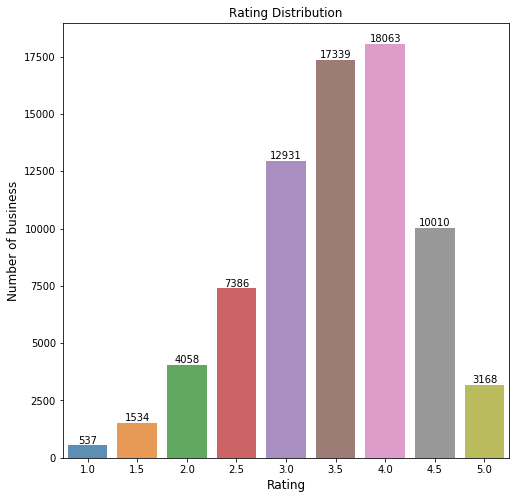

In [17]:
plt.figure(figsize=(8,8))
ax = sns.barplot(rating_dist.index, rating_dist.values, alpha=0.8)
plt.title("Rating Distribution")
plt.ylabel('Number of business', fontsize=12)
plt.xlabel('Rating', fontsize=12)

rects = ax.patches
labels = rating_dist.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

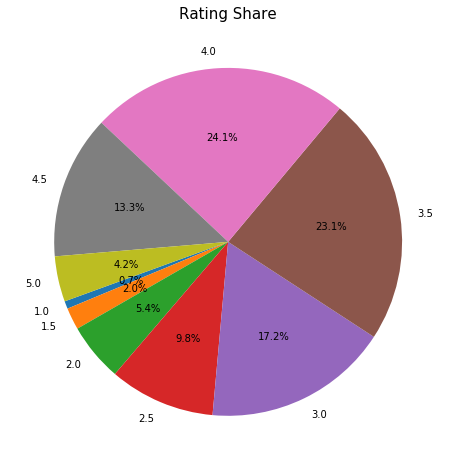

In [19]:
plt.figure(figsize=(8,8))
labels = (np.array(rating_dist.index))
sizes = (np.array((rating_dist / rating_dist.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct= '%1.1f%%', startangle = 200)
plt.title("Rating Share", fontsize=15)
plt.show()

### 2.2 Top Categories, State and City in terms of number of business

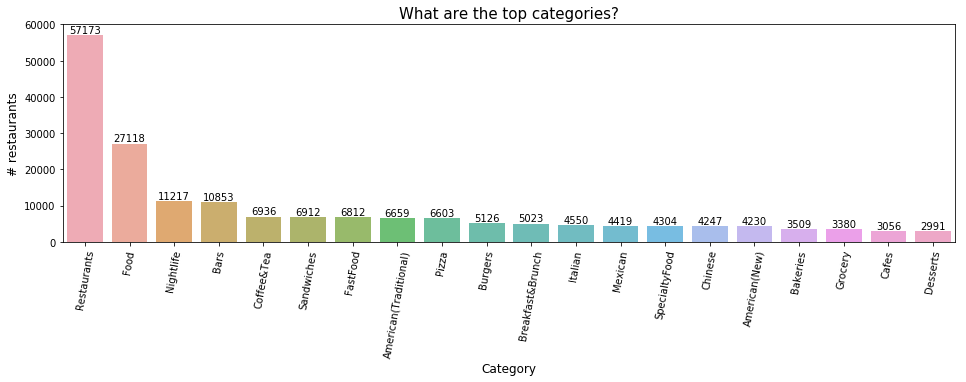

In [20]:
x = cat_all_res_count.iloc[0:20]

plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("What are the top categories?",fontsize=15)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# restaurants', fontsize=12)
plt.xlabel('Category', fontsize=12)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

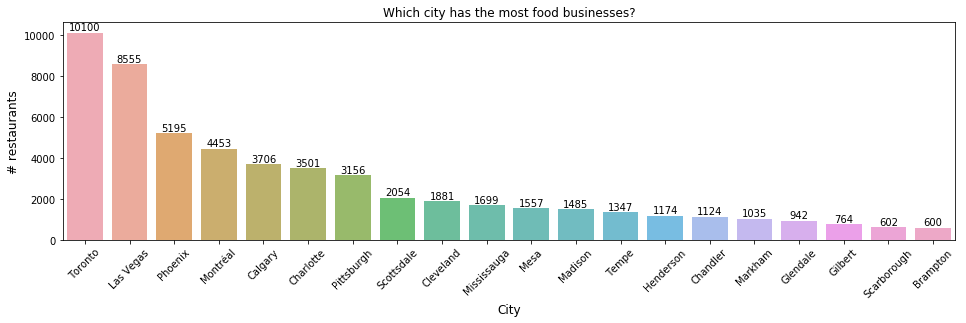

In [17]:
# Location distribution

city_count = restaurants['city'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(16,4))
ax = sns.barplot(city_count[0:20].index, city_count[0:20].values, alpha=0.8)
plt.title("Which city has the most food businesses?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# restaurants', fontsize=12)
plt.xlabel('City', fontsize=12)

rects = ax.patches
labels = city_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

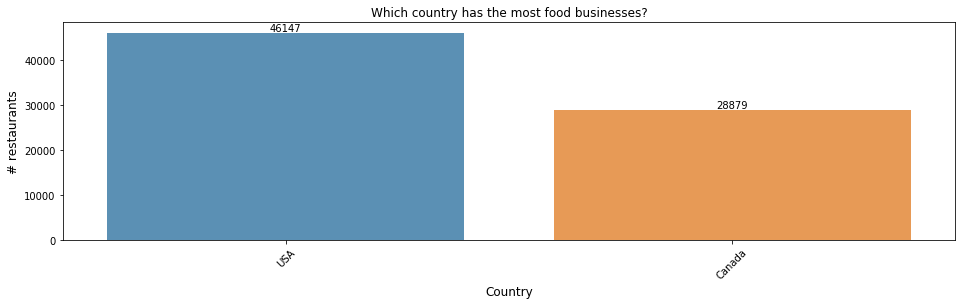

In [18]:
# Country distribution

country_count = restaurants['country'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(16,4))
ax = sns.barplot(country_count.index, country_count.values, alpha=0.8)
plt.title("Which country has the most food businesses?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# restaurants', fontsize=12)
plt.xlabel('Country', fontsize=12)

rects = ax.patches
labels = country_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

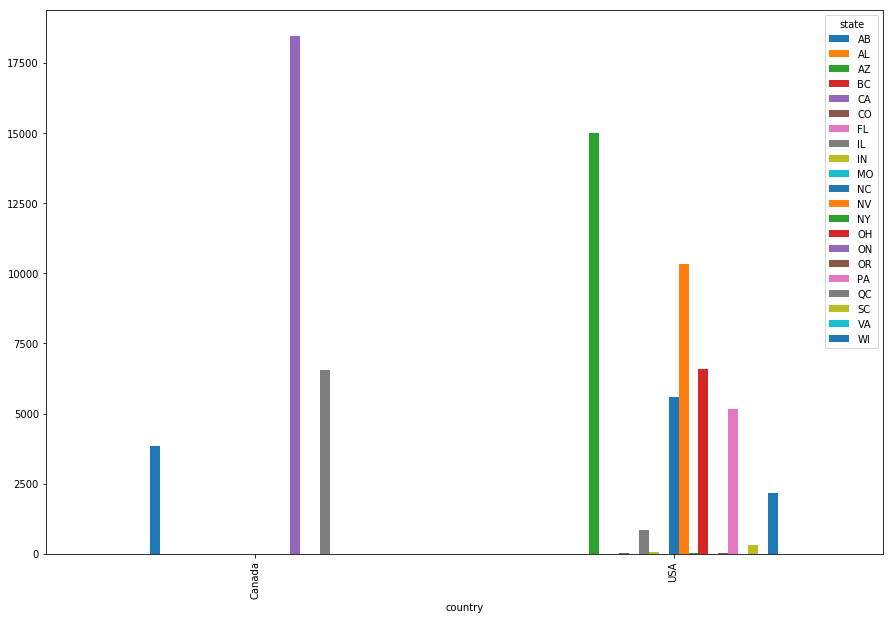

In [23]:
country_state = restaurants.groupby(['country','state'])
country_state = country_state.size().unstack().plot(kind = 'bar',figsize = (15,10))

### 2.3 A glimpse into the businesses with top number of reviews

In [24]:
# Top restaurants by number of reviews
restaurants[['name', 'business_id','review_count', 'city', 'stars']].sort_values(ascending=False, by="review_count")[0:20]

,name,business_id,review_count,city,stars
137635,Mon Ami Gabi,4JNXUYY8wbaaDmk3BPzlWw,7968,Las Vegas,4.0
185167,Bacchanal Buffet,RESDUcs7fIiihp38-d6_6g,7866,Las Vegas,4.0
62723,Wicked Spoon,K7lWdNUhCbcnEvI0NhGewg,6446,Las Vegas,3.5
188309,Gordon Ramsay BurGR,cYwJA2A6I12KNkm2rtXd5g,5472,Las Vegas,4.0
170129,Hash House A Go Go,f4x1YBxkLrZg652xt2KR5g,5382,Las Vegas,4.0
177573,Earl of Sandwich,DkYS3arLOhA8si5uUEmHOw,4981,Las Vegas,4.5
181524,The Buffet,2weQS-RnoOBhb1KsHKyoSQ,4240,Las Vegas,3.5
135008,The Buffet at Bellagio,ujHiaprwCQ5ewziu0Vi9rw,4091,Las Vegas,3.5
180795,Secret Pizza,iCQpiavjjPzJ5_3gPD5Ebg,4078,Las Vegas,4.0
28596,Lotus of Siam,KskYqH1Bi7Z_61pH6Om8pg,3975,Las Vegas,4.0


# 3. Feature Selection

### 3.0 We initially hypothesize that the following features are important

Because there are so many attributes we get from the datasets, we narrow down the features based on our domain knowledge.

**Review and User-related features**

* Review Count
* Maximum number of stars
* Minimum number of stars
* Number of reviews voted as 'cool'
* Number of reviews voted as 'funny'
* Number of reviews voted as 'useful'
* Time since first/last reviews
* Time between first and last reviews


**Business Attributes features:**
    
* Food Categories (types of food)
* Attire (casual/classy/formal)
* Business Parking
* Restaurant Reservations
* Good for Kids
* Smoking
* Open 24 Hours
* Good for Meal (breakfast & brunch or dinner)
* Noise Level
* Music (background music/No)
* Ages Allowed
* Good for Groups
* WiFi
* Business Accepts Credit Cards
* Ambience
* Restaurant Price Range
* Happy Hour
* Outdoors Seating

In [25]:
col = restaurants.columns
col

Index(['hours.Friday', 'attributes.RestaurantsAttire',
       'attributes.BikeParking', 'state', 'categories',
       'attributes.BusinessParking', 'attributes.Alcohol',
       'attributes.GoodForDancing', 'attributes.BYOB',
       'attributes.DietaryRestrictions', 'attributes.RestaurantsReservations',
       'attributes.GoodForKids', 'attributes.Smoking', 'hours.Sunday',
       'attributes.BYOBCorkage', 'latitude',
       'attributes.BusinessAcceptsBitcoin', 'attributes.GoodForMeal',
       'attributes.BestNights', 'attributes.NoiseLevel', 'attributes.Corkage',
       'attributes.Music', 'hours.Wednesday', 'attributes.Open24Hours',
       'longitude', 'neighborhood', 'attributes.HairSpecializesIn',
       'hours.Thursday', 'attributes.AgesAllowed',
       'attributes.ByAppointmentOnly', 'business_id',
       'attributes.RestaurantsDelivery', 'attributes.RestaurantsGoodForGroups',
       'postal_code', 'attributes.RestaurantsTableService', 'attributes.WiFi',
       'hours', 'attributes

### 3.1 Merge Restaurants with Users and Reviews

In [3]:
#importing the yelp reviews dataset
datastr=open('yelp_academic_dataset_review.json','r')
datajson=datastr.readlines()
check=[json.loads(x) for x in datajson]
ind=range(0,len(check))
reviews=pd.DataFrame(check,index=ind,columns=check[0].keys())

In [26]:
reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')

In [27]:
restaurant_reviews = reviews[reviews["business_id"].isin(restaurants["business_id"])]

In [28]:
# User counts, max and min ratings
user_rating_count = restaurant_reviews[['user_id','business_id']].groupby(['business_id']).count()
user_rating_count = user_rating_count.rename(columns = {'business_id':'user_rating_count'})
max_rating_restaurant = restaurant_reviews[['business_id','stars']].groupby(['business_id']).max()
max_rating_restaurant = max_rating_restaurant.rename(columns = {'stars':'max_rating_rest'})
min_rating_restaurant = restaurant_reviews[['business_id','stars']].groupby(['business_id']).min()
min_rating_restaurant = min_rating_restaurant.rename(columns = {'stars':'min_rating_rest'})

In [29]:
# Useful, funny, cool
useful_mean = restaurant_reviews[['business_id','useful']].groupby(['business_id']).mean()
useful_mean = useful_mean.rename(columns = {'business_id':'useful_mean'})
funny_mean = restaurant_reviews[['business_id','funny']].groupby(['business_id']).mean()
funny_mean = funny_mean.rename(columns = {'business_id':'funny_mean'})
cool_mean = restaurant_reviews[['business_id','cool']].groupby(['business_id']).mean()
cool_mean = cool_mean.rename(columns = {'business_id':'cool_mean'})

In [30]:
restaurants = restaurants.merge(max_rating_restaurant, how = 'left', on = 'business_id')
restaurants = restaurants.merge(min_rating_restaurant, how = 'left', on = 'business_id')
restaurants = restaurants.merge(useful_mean, how = 'left', on = 'business_id')
restaurants = restaurants.merge(funny_mean, how = 'left', on = 'business_id')
restaurants = restaurants.merge(cool_mean, how = 'left', on = 'business_id')

In [31]:
restaurants.head()

,hours.Friday,attributes.RestaurantsAttire,attributes.BikeParking,state,categories,attributes.BusinessParking,attributes.Alcohol,attributes.GoodForDancing,attributes.BYOB,attributes.DietaryRestrictions,...,attributes.AcceptsInsurance,attributes,stars,city,country,max_rating_rest,min_rating_rest,useful,funny,cool
0,11:0-21:0,casual,False,AB,"Tours, Breweries, Pizza, Restaurants, Food, Ho...","{'garage': False, 'street': True, 'validated':...",NaN,NaN,NaN,NaN,...,NaN,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",4.0,Calgary,Canada,5,1,0.541667,0.250000,0.208333
1,17:0-23:0,casual,False,NV,"Chicken Wings, Burgers, Caterers, Street Vendo...","{'garage': False, 'street': True, 'validated':...",none,NaN,NaN,NaN,...,NaN,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",4.5,Henderson,USA,5,4,0.333333,0.000000,0.333333
2,10:0-22:0,casual,True,QC,"Breakfast & Brunch, Restaurants, French, Sandw...","{'garage': False, 'street': False, 'validated'...",beer_and_wine,NaN,NaN,NaN,...,NaN,"{'Alcohol': 'beer_and_wine', 'Ambience': ""{'ro...",4.0,Montréal,Canada,5,1,0.200000,0.000000,0.400000
3,5:30-21:0,NaN,True,AZ,"Coffee & Tea, Food","{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,...,NaN,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",4.0,Phoenix,USA,5,1,0.935484,0.548387,0.629032
4,NaN,NaN,NaN,ON,"Food, Bakeries","{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,...,NaN,"{'BusinessParking': ""{'garage': False, 'street...",4.0,Toronto,Canada,5,3,1.142857,1.142857,1.285714


### 3.2 Time-related features

In [32]:
reviews_date = reviews[['business_id','date']]

In [33]:
reviews_date.date = pd.to_datetime(reviews_date.date)

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [34]:
reviews_date_earliest = reviews_date.groupby('business_id')['date'].min()

In [35]:
reviews_date_earliest = reviews_date_earliest.to_frame()

In [36]:
reviews_date_latest = reviews_date.groupby('business_id')['date'].max()
reviews_date_latest = reviews_date_latest.to_frame()

In [37]:
reviews_date = reviews_date_earliest.merge(reviews_date_latest, how = 'outer', on = 'business_id') 

In [38]:
reviews_date = reviews_date.rename(index=str, columns={"date_x": "earliest_review_date", "date_y": "latest_review_date"})

In [39]:
reviews_date['date_difference'] = reviews_date['latest_review_date'] - reviews_date['earliest_review_date'] 

In [40]:
from datetime import datetime
reviews_date['earliest_till_now'] = datetime.today() - reviews_date['earliest_review_date']
reviews_date['latest_till_now'] = datetime.today() - reviews_date['latest_review_date']

In [41]:
reviews_date['earliest_till_now'] = reviews_date['earliest_till_now'].astype('timedelta64[D]')

In [42]:
reviews_date['latest_till_now'] = reviews_date['latest_till_now'].astype('timedelta64[D]')
reviews_date['date_difference'] = reviews_date['date_difference'].astype('timedelta64[D]')

In [43]:
reviews_date.head()

,earliest_review_date,latest_review_date,date_difference,earliest_till_now,latest_till_now
business_id,,,,,
--1UhMGODdWsrMastO9DZw,2016-06-04,2018-05-06,701.0,911.0,210.0
--6MefnULPED_I942VcFNA,2008-08-07,2018-05-21,3574.0,3769.0,195.0
--7zmmkVg-IMGaXbuVd0SQ,2014-12-30,2018-06-01,1249.0,1433.0,184.0
--8LPVSo5i0Oo61X01sV9A,2014-05-15,2018-02-10,1367.0,1662.0,295.0
--9QQLMTbFzLJ_oT-ON3Xw,2013-05-15,2018-02-17,1739.0,2027.0,288.0


In [44]:
restaurants = restaurants.merge(reviews_date, how = 'left', on = 'business_id')

### 3.3 Ambience

In [45]:
# Understand the ambience
restaurants['attributes.Ambience'].unique()

array([nan,
       "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}",
       "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}",
       "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}",
       "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': True, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}",
       "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}",
       "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': True, 'upscale': False, 'casual': False}",
       "{'roma

In [46]:
def ambience_extract(row):
    ambience_list = list()
    import ast
    if pd.isnull(row['attributes.Ambience']):
        return None
    else:
        for key, value in ast.literal_eval(row['attributes.Ambience']).items():
            if value == True:
                ambience_list.append(key)
        return ",".join(ambience_list)

In [47]:
restaurants['Ambience'] = restaurants.apply(lambda row: ambience_extract(row),axis=1)

In [48]:
ambience_list = restaurants['Ambience'].tolist()
ambience_list = [x for x in ambience_list if x is not None and x != '']

In [49]:
cat_all_am = ','.join(ambience_list)

In [50]:
cat_all_am = pd.DataFrame(cat_all_am.split(','), columns=['Ambience'])
cat_all_am_count = cat_all_am.Ambience.value_counts().sort_values(ascending = False)
cat_all_am_count

casual      22192
trendy       2428
classy       1061
divey        1057
hipster      1043
intimate      672
romantic      599
upscale       494
touristy      229
Name: Ambience, dtype: int64

We create dummy variables for 'casual', 'trendy' and 'Others'

In [51]:
def ambience_casual(row):
    if row['Ambience'] is not None and row['Ambience'] != '':
        if 'casual' in row['Ambience'].split(','):
            return 1
        else:
            return 0
    else:
        return 0
restaurants['ambience_casual'] = restaurants.apply(lambda row: ambience_casual(row),axis=1)

In [52]:
def ambience_trendy(row):
    if row['Ambience'] is not None and row['Ambience'] != '':
        if 'trendy' in row['Ambience'].split(','):
            return 1
        else:
            return 0
    else:
        return 0
restaurants['ambience_trendy'] = restaurants.apply(lambda row: ambience_trendy(row),axis=1)

In [53]:
ambience_others_list = ['romantic', 'intimate', 'classy', 'hipster', 'touristy', 'upscale', 'divey']
def ambience_others(row):
    if row['Ambience'] is not None and row['Ambience'] != '':
        if (set(ambience_others_list) & set(row['Ambience'].split(','))):
            return 1
        else:
            return 0
    else:
        return 0
restaurants['ambience_others'] = restaurants.apply(lambda row: ambience_others(row),axis=1)

### 3.4 Food categories

Food label will include:
1. American Food
2. Asian Food
3. European Food 
4. Sandwich
5. Burgers
6. Restaurants

In [54]:
american_food = ['American(Traditional)', 'American(New)']
asian_food = ['Chinese','Malaysian','Japanese','AsianFusion','SushiBars','PanAsian','Poke','Indian','Thai',
             'Szechuan','Vietnamese','Korean','Cantonese','Dim Sum','Taiwanese','Filipino','Ramen','Noodles']
european_food = ['Italian','Mediterranean','British','Delicatessen','French','Greek','Polish','Irish','German',
                'Spanish','Portuguese']

In [55]:
def american_food_label(row):
    if bool(set(row['categories'].replace(" ","").split(',')) & set(american_food)):
        return 1
    else:
        return 0
restaurants['american_food'] = restaurants.apply(lambda row: american_food_label(row),axis=1)

In [56]:
def asian_food_label(row):
    if bool(set(row['categories'].replace(" ","").split(',')) & set(asian_food)):
        return 1
    else:
        return 0
restaurants['asian_food'] = restaurants.apply(lambda row: asian_food_label(row),axis=1)

In [57]:
def european_food_label(row):
    if bool(set(row['categories'].replace(" ","").split(',')) & set(european_food)):
        return 1
    else:
        return 0
restaurants['european_food'] = restaurants.apply(lambda row: european_food_label(row),axis=1)

In [58]:
def sandwich_label(row):
    if "Sandwiches" in (row['categories'].replace(" ","").split(',')):
        return 1
    else:
        return 0
restaurants['sandwich'] = restaurants.apply(lambda row: sandwich_label(row),axis=1)

In [59]:
def burger_label(row):
    if "Burgers" in (row['categories'].replace(" ","").split(',')):
        return 1
    else:
        return 0
restaurants['burger'] = restaurants.apply(lambda row: burger_label(row),axis=1)

In [60]:
def restaurant_label(row):
    if "Restaurants" in (row['categories'].replace(" ","").split(',')):
        return 1
    else:
        return 0
restaurants['restaurant'] = restaurants.apply(lambda row: restaurant_label(row),axis=1)

### 3.5 Ordered Features: Ages Allow

In [61]:
restaurants['attributes.AgesAllowed'].unique()

array([nan, '18plus', '21plus', 'allages', '19plus'], dtype=object)

In [62]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
restaurants['attributes.AgesAllowed'].fillna('0',inplace=True)
le.fit(['0',"allages", "18plus", "19plus", "21plus"])

/usr/local/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 12] Cannot allocate memory.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


LabelEncoder()

In [63]:
le.inverse_transform([0, 2, 1])

array(['0', '19plus', '18plus'], dtype='<U7')

In [64]:
restaurants['attributes.AgesAllowed'] = le.transform(restaurants['attributes.AgesAllowed']) 

### 3.6 Other Categorical Features

We will only extract three more features:
1. Business Parking: Yes/No
2. GoodForMeal: breakfast_brunch or dinner
3. Music: background_music or no_music

BUSINESS PARKING

In [65]:
def bp_extract(row):
    bp = list()
    import ast
    if pd.isnull(row['attributes.BusinessParking']):
        return 0
    else:
        for key, value in ast.literal_eval(row['attributes.BusinessParking']).items():
            if value == True:
                bp.append(key)
        if bp:
            return 1
        else:
            return 0
restaurants['business_parking'] = restaurants.apply(lambda row: bp_extract(row),axis=1)

GOOD FOR MEAL

In [66]:
def meal_extract(row):
    meal = list()
    import ast
    if pd.isnull(row['attributes.GoodForMeal']):
        return 'Others'
    else:
        for key, value in ast.literal_eval(row['attributes.GoodForMeal']).items():
            if value == True:
                meal.append(key)
        if ('breakfast' in meal) or ('brunch' in meal):
            return 'breakfast_brunch'
        elif ('dinner' in meal):
            return 'dinner'
        else:
            return 'Others'
restaurants['meal'] = restaurants.apply(lambda row: meal_extract(row),axis=1)

In [67]:
def breakfast_brunch_label(row):
    if row['meal'] == 'breakfast_brunch':
        return 1
    else:
        return 0
restaurants['breakfast_brunch'] = restaurants.apply(lambda row: breakfast_brunch_label(row),axis=1)

In [68]:
def dinner_label(row):
    if row['meal'] == 'dinner':
        return 1
    else:
        return 0
restaurants['dinner'] = restaurants.apply(lambda row: dinner_label(row),axis=1)

MUSIC

In [69]:
def music_extract(row):
    music = list()
    import ast
    if pd.isnull(row['attributes.Music']):
        return 'Others'
    else:
        for key, value in ast.literal_eval(row['attributes.Music']).items():
            if value == True:
                music.append(key)
        if 'background_music' in music:
            return 'background_music'
        elif 'no_music' in music:
            return 'no_music'
        else:
            return 'Others'
restaurants['music'] = restaurants.apply(lambda row: music_extract(row),axis=1)

In [70]:
def background_music_label(row):
    if row['music'] == 'background_music':
        return 1
    else:
        return 0
restaurants['background_music'] = restaurants.apply(lambda row: background_music_label(row),axis=1)

In [71]:
def no_music_label(row):
    if row['music'] == 'no_music':
        return 1
    else:
        return 0
restaurants['no_music'] = restaurants.apply(lambda row: no_music_label(row),axis=1)

### 3.7 Create Dummy Variables for features

In [72]:
cols_dummy = ['attributes.RestaurantsAttire','attributes.Alcohol',
        'attributes.RestaurantsReservations','attributes.GoodForKids','attributes.Smoking',
        'attributes.NoiseLevel','attributes.Open24Hours',
        'attributes.ByAppointmentOnly','attributes.RestaurantsDelivery',
        'attributes.RestaurantsGoodForGroups','attributes.RestaurantsTableService','attributes.WiFi',
        'attributes.DogsAllowed','attributes.BusinessAcceptsCreditCards',
        'attributes.DriveThru','attributes.Caters','attributes.RestaurantsTakeOut',
        'attributes.WheelchairAccessible','attributes.HasTV','attributes.HappyHour',
        'attributes.CoatCheck','attributes.OutdoorSeating','is_open','attributes.AcceptsInsurance']

In [73]:
res_full = pd.get_dummies(data=restaurants, columns = cols_dummy)

In [74]:
res_full.columns.values.tolist()

['hours.Friday',
 'attributes.BikeParking',
 'state',
 'categories',
 'attributes.BusinessParking',
 'attributes.GoodForDancing',
 'attributes.BYOB',
 'attributes.DietaryRestrictions',
 'hours.Sunday',
 'attributes.BYOBCorkage',
 'latitude',
 'attributes.BusinessAcceptsBitcoin',
 'attributes.GoodForMeal',
 'attributes.BestNights',
 'attributes.Corkage',
 'attributes.Music',
 'hours.Wednesday',
 'longitude',
 'neighborhood',
 'attributes.HairSpecializesIn',
 'hours.Thursday',
 'attributes.AgesAllowed',
 'business_id',
 'postal_code',
 'hours',
 'review_count',
 'name',
 'hours.Saturday',
 'attributes.Ambience',
 'attributes.RestaurantsCounterService',
 'address',
 'attributes.RestaurantsPriceRange2',
 'hours.Tuesday',
 'hours.Monday',
 'attributes',
 'stars',
 'city',
 'country',
 'max_rating_rest',
 'min_rating_rest',
 'useful',
 'funny',
 'cool',
 'earliest_review_date',
 'latest_review_date',
 'date_difference',
 'earliest_till_now',
 'latest_till_now',
 'Ambience',
 'ambience_casual

### 3.8 Final Feature Selection before any Feature Reduction

In [1]:
cols_ml = ['review_count',
 'attributes.RestaurantsAttire_casual',
 'attributes.RestaurantsAttire_dressy',
 'attributes.RestaurantsAttire_formal',
 'attributes.RestaurantsReservations_True',
 'attributes.GoodForKids_True',
 'attributes.Smoking_yes',
 'attributes.NoiseLevel_very_loud',
 'attributes.Open24Hours_True',
 'attributes.RestaurantsGoodForGroups_True',
 'attributes.WiFi_free',
 'attributes.BusinessAcceptsCreditCards_True',
 'attributes.RestaurantsPriceRange2',
 'attributes.HappyHour_True',
 'attributes.OutdoorSeating_True',
 'ambience_casual',
 'ambience_trendy',
 'attributes.AgesAllowed',
 'max_rating_rest',
 'min_rating_rest',
 'useful','funny','cool',
 'american_food','asian_food','european_food',
 'sandwich','burger','restaurant',
 'date_difference','earliest_till_now','latest_till_now',
 'no_music','background_music',
 'business_parking','breakfast_brunch','dinner']

# 4. Machine Learning Models

* Linear Regression
* Logistic Regression
* Decision Tree
* Random Forest
* Bootstrapping

### 4.0 Preprocessing

In [80]:
X = res_full[cols_ml]
y = res_full['stars']

In [81]:
X.fillna(0,inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


BACKWARD ELIMINATION OF FEATURES HAVING P-VALUE < 0.05 SIGNIFICANCE LEVEL

In [82]:
import statsmodels.api as sm
OLS_model=sm.OLS(y,X)
result=OLS_model.fit()
print(result.summary2())

                              Results: Ordinary least squares
Model:                       OLS                     Adj. R-squared:            0.978      
Dependent Variable:          stars                   AIC:                       119515.3116
Date:                        2018-12-02 20:30        BIC:                       119838.2073
No. Observations:            75026                   Log-Likelihood:            -59723.    
Df Model:                    35                      F-statistic:               9.375e+04  
Df Residuals:                74991                   Prob (F-statistic):        0.00       
R-squared:                   0.978                   Scale:                     0.28784    
-------------------------------------------------------------------------------------------
                                            Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------------------
review_count      

Eliminate these features with p < 0.05:
* Business Attire: Casual
* Business Attire: Formal
* Restaurant Reservations
* Good for Groups
* Free WiFi
* No Music
* Background Music

In [83]:
cols_ml = ['review_count',
 'attributes.RestaurantsAttire_dressy',
 'attributes.GoodForKids_True',
 'attributes.Smoking_yes',
 'attributes.NoiseLevel_very_loud',
 'attributes.Open24Hours_True',
 'attributes.BusinessAcceptsCreditCards_True',
 'attributes.RestaurantsPriceRange2',
 'attributes.HappyHour_True',
 'attributes.OutdoorSeating_True',
 'ambience_casual',
 'ambience_trendy',
 'attributes.AgesAllowed',
 'max_rating_rest',
 'min_rating_rest',
 'useful','funny','cool',
 'american_food','asian_food','european_food',
 'sandwich','burger','restaurant',
 'date_difference','earliest_till_now','latest_till_now',
 'business_parking','breakfast_brunch','dinner']

In [84]:
X = res_full[cols_ml]
y = res_full['stars']
X.fillna(0,inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [85]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3)

### 4.1 Linear Regression

In [86]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
pred_y  = model.predict(test_X)
pred_y

array([3.6107913 , 3.55183028, 3.78136708, ..., 3.60577707, 3.32120467,
       3.92628734])

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, pred_y))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, pred_y))

Coefficients: 
 [ 5.09853461e-04  1.45241754e-01 -2.71297088e-02  8.50312294e-02
 -2.29793156e-01 -1.11427555e-01 -3.37942336e-02  8.01263325e-03
 -2.76714805e-02  3.13711285e-02  9.88704120e-02  1.38297579e-01
 -8.01841753e-02  6.31116099e-01  4.26222393e-01 -2.56041500e-02
 -9.15096011e-02  1.53982865e-01 -4.85122664e-02  2.75934762e-02
  7.56673251e-02  6.43880683e-02 -2.63146296e-01 -9.08020644e-02
  3.66615637e+08 -3.66615637e+08  3.66615637e+08  2.00342448e-01
  5.76348186e-02  1.05466012e-01]
Mean squared error: 0.29
Variance score: 0.57


### 4.2 Try to classify the successful restaurant using the result above

In [89]:
res_full['success'] = np.where(restaurants['stars'] >= 3.5,1,0)

In [90]:
X = res_full[cols_ml]
y = res_full['success']
X.fillna(0,inplace=True)
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state = 11)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [91]:
def get_classification(predictions, threshold):
    classes = np.zeros_like(predictions)
    for i in range(len(classes)):
        if predictions[i] > threshold:
            classes[i] = 1
    return classes
get_classification(pred_y, 4)

array([0., 0., 0., ..., 0., 0., 0.])

In [92]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_y, get_classification(pred_y,4)).ravel()
print(tn, fp, fn, tp)

6787 1151 12395 2175


In [93]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.39816953971921093


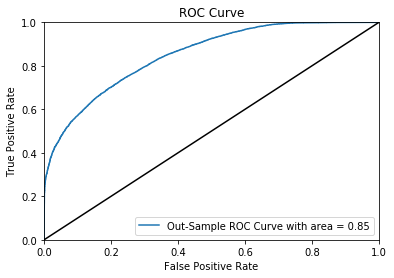

In [94]:
from sklearn.metrics import roc_curve, auc
testing_predictions = model.predict(test_X)
(fpr, tpr, thresholds) = roc_curve(test_y,testing_predictions)

area = auc(fpr,tpr)
plt.clf() #Clear the current figure
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### 4.3 Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression().fit(train_X,train_y)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [415]:
trainset_acc = logr.score(train_X,train_y)
print('logr training set accuracy: {:.3f}'.format(trainset_acc))

logr training set accuracy: 0.790


In [96]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(train_X, train_y)
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[False  True False  True  True  True  True False False False  True  True
 False  True  True  True  True  True  True False  True  True  True  True
 False False False  True  True  True]
[ 7  1  5  1  1  1  1  8  6  3  1  1  2  1  1  1  1  1  1  4  1  1  1  1
 11  9 10  1  1  1]


In [97]:
rfe_rank = rfe.support_

In [104]:
from itertools import compress
cols_log = list(compress(cols_ml, rfe_rank))

In [105]:
cols_clas

['attributes.RestaurantsAttire_dressy',
 'attributes.Smoking_yes',
 'attributes.NoiseLevel_very_loud',
 'attributes.Open24Hours_True',
 'attributes.BusinessAcceptsCreditCards_True',
 'ambience_casual',
 'ambience_trendy',
 'max_rating_rest',
 'min_rating_rest',
 'useful',
 'funny',
 'cool',
 'american_food',
 'european_food',
 'sandwich',
 'burger',
 'restaurant',
 'business_parking',
 'breakfast_brunch',
 'dinner']

We can see that the following features are eliminated:
* Review Count (surprising enough, the review counts are not that important when it comes to high ratings)
* Good For Kids
* Price Range
* Happy Hour
* Outdoors Seating
* Ages Allowed
* Serving Asian food
* The time-related features

In [106]:
X = X[cols_log]

In [107]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.513858
         Iterations 7
                                      Results: Logit
Model:                        Logit                    Pseudo R-squared:         0.208     
Dependent Variable:           success                  AIC:                      77145.4209
Date:                         2018-12-02 20:39         BIC:                      77329.9327
No. Observations:             75026                    Log-Likelihood:           -38553.   
Df Model:                     19                       LL-Null:                  -48690.   
Df Residuals:                 75006                    LLR p-value:              0.0000    
Converged:                    1.0000                   Scale:                    1.0000    
No. Iterations:               7.0000                                                       
-------------------------------------------------------------------------------------------
                 

Continue to eliminate Open 24 Hours

In [109]:
cols_log = ['attributes.RestaurantsAttire_dressy',
 'attributes.Smoking_yes',
 'attributes.NoiseLevel_very_loud',
 'attributes.BusinessAcceptsCreditCards_True',
 'ambience_casual',
 'ambience_trendy',
 'max_rating_rest',
 'min_rating_rest',
 'useful',
 'funny',
 'cool',
 'american_food',
 'european_food',
 'sandwich',
 'burger',
 'restaurant',
 'business_parking',
 'breakfast_brunch',
 'dinner']

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [111]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


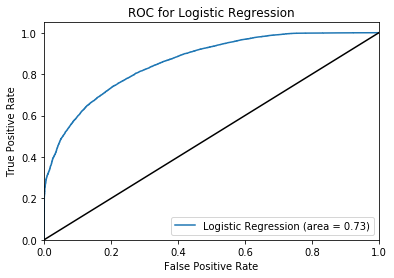

In [146]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 4.4 Decision Trees

In [118]:
X = res_full[cols_ml]
y = res_full['success']
X.fillna(0,inplace=True)
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 5,criterion='entropy')
model.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [120]:
from sklearn.metrics import confusion_matrix
p_train=model.predict(train_X)
p_test = model.predict(test_X)
print(confusion_matrix(p_train,np.array(train_y)))
print(confusion_matrix(p_test,np.array(test_y)))

[[ 7913  1779]
 [10587 32239]]
[[ 3470   758]
 [ 4476 13804]]


In [121]:
cm = confusion_matrix(p_test,np.array(test_y))

In [122]:
Accuracy = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
print(f'Accuracy is {Accuracy}') 

Accuracy is 0.7674604585036432


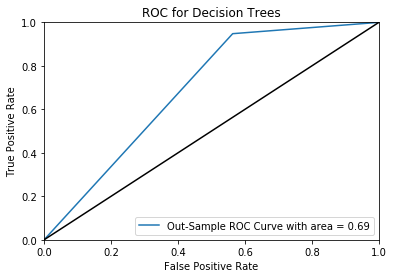

In [123]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(test_y,p_test)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC for Decision Trees')
pl.legend(loc="lower right")
pl.show()

### 4.5 Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [125]:
rf.score(test_X,test_y)

0.7802559090101298

In [126]:
rf.feature_importances_

array([0.08758079, 0.00183614, 0.01014048, 0.00173166, 0.00441142,
       0.00013501, 0.00828887, 0.02245989, 0.00638851, 0.01102361,
       0.00868247, 0.00198536, 0.00104941, 0.11946859, 0.13091546,
       0.07635207, 0.08413246, 0.09907673, 0.00753967, 0.00897326,
       0.0078525 , 0.0067759 , 0.0095314 , 0.0072243 , 0.08216873,
       0.08422404, 0.07890948, 0.0176184 , 0.00509263, 0.00843077])

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

importances = rf.feature_importances_
indices = np.argsort(importances)

In [128]:
pred_y = rf.predict(test_X)
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y)
metrics.auc(fpr, tpr)

0.7596744479017188

In [129]:
importances_series = list(zip(cols_log, importances*100))

In [130]:
importances_series = list(zip(*importances_series))
importances_series = pd.Series(importances_series[1], index = importances_series[0])

In [131]:
importances_series = importances_series.sort_values(ascending=False)
importances_series

burger                                        13.091546
sandwich                                      11.946859
breakfast_brunch                               9.907673
attributes.RestaurantsAttire_dressy            8.758079
business_parking                               8.413246
restaurant                                     7.635207
min_rating_rest                                2.245989
funny                                          1.102361
attributes.NoiseLevel_very_loud                1.014048
cool                                           0.868247
max_rating_rest                                0.828887
dinner                                         0.753967
useful                                         0.638851
ambience_casual                                0.441142
american_food                                  0.198536
attributes.Smoking_yes                         0.183614
attributes.BusinessAcceptsCreditCards_True     0.173166
european_food                                  0

Text(0.5, 0, 'Features')

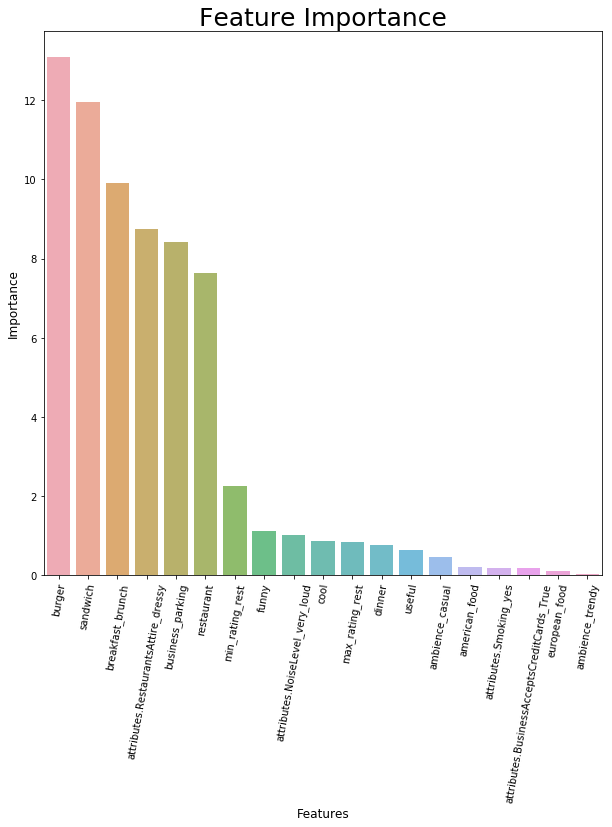

In [132]:
plt.figure(figsize=(10,10))
ax = sns.barplot(importances_series.index, importances_series.values, alpha=0.8)
plt.title("Feature Importance",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Features', fontsize=12)

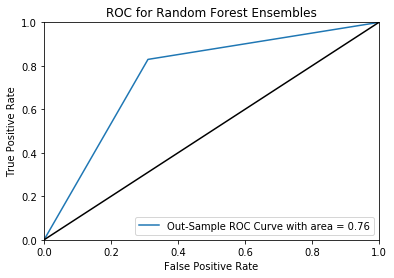

In [133]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
area = auc(fpr,tpr)
pl.clf() 
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC for Random Forest Ensembles')
pl.legend(loc="lower right")
pl.show()

### 4.6 Bootstrapping

In [140]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(train_X,np.ravel(train_y))

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [141]:
pred_y = bc.predict(test_X)

In [142]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y)

In [143]:
metrics.auc(fpr, tpr)

0.7523437975597749

In [144]:
bc.score(test_X, test_y)

0.7708814643682246

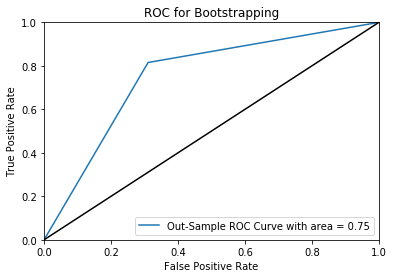

In [147]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline

pred_y = bc.predict(test_X)
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y)
metrics.auc(fpr, tpr)

area = auc(fpr,tpr)
pl.clf() 
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC for Bootstrapping')
pl.legend(loc="lower right")
pl.show()